Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 04-January-2026

In [34]:
# Import libraries 
import navis
import flybrains
from fafbseg import flywire
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt

In [35]:
# Settings
data_dir = r'../data/'
neurons_to_plot = "DN_LTct_cluster" # "RRN", "RRN_BPN", "DN_leg_cluster", "DN_LTct_cluster"

# Load neurons of interest
df_neurons_of_interest = pd.read_csv(data_dir + 'neurons_of_interest.csv')

In [36]:
# Set colors
color_dict = {}

color_RRN = [0/255,173/255,238/255,1]
color_BPN = [36/255,62/255,144/255,1]
color_RRN_BPN = [18/255,118/255,191/255,1]

color_dict["RRN"] = color_RRN
color_dict["BPN"] = color_BPN

# Leg cluster
color_dict["DNg101"] = color_RRN 
color_dict["DNg102"] = color_RRN
color_dict["DNp64"] = color_BPN
color_dict["DNge050"] = color_RRN_BPN 
color_dict["DNd05"] = color_RRN_BPN 
color_dict["DNge048"] = color_RRN_BPN 
color_dict["DNg45"] = color_RRN
color_dict["DNge082"] = color_BPN
color_dict["DNpe020"] = color_BPN
color_dict["DNg44"] = color_RRN
color_dict["DNge103"] = color_RRN

# LTct cluster
color_dict["DNpe053"] = color_BPN 
color_dict["DNp13"] = color_RRN 
color_dict["DNge053"] = color_BPN 
color_dict["DNge150"] = color_BPN 
color_dict["DNp68"] = color_RRN_BPN 
color_dict["DNp66"] = color_RRN 
color_dict["DNpe042"] = color_RRN_BPN 
color_dict["DNp45"] = color_RRN 
color_dict["DNg55"] = color_BPN 

In [37]:
# Set root IDs and colors
root_ids_to_plot, color = [], []

if neurons_to_plot == "RRN":
    root_ids = [720575940639781027]
    root_ids_to_plot.append(root_ids)
    color.append(color_dict["RRN"]) 

elif neurons_to_plot == "RRN_BPN":
    root_ids = df_neurons_of_interest.connectome_id[df_neurons_of_interest.community_name.str.contains('BPN')].tolist()
    root_ids_to_plot.append(root_ids)
    for root_id in root_ids:
        color.append(color_dict["BPN"]) 

    root_ids = df_neurons_of_interest.connectome_id[df_neurons_of_interest.community_name=='RRN'].tolist()
    root_ids_to_plot.append(root_ids)
    for root_id in root_ids:
        color.append(color_dict["RRN"]) 

elif neurons_to_plot == "DN_leg_cluster":
    cell_types = ["DNg101", "DNg102", "DNp64", "DNge050", "DNd05", "DNge048", "DNg45", "DNge082", "DNpe020", 
                   "DNg44", "DNge103"] 
    for cell_type in cell_types:
        root_ids = df_neurons_of_interest.connectome_id[(df_neurons_of_interest.cell_type==cell_type) & (df_neurons_of_interest.connectome_dataset.str.contains('flywire'))].tolist()
        root_ids_to_plot.append(root_ids)
        for root_id in root_ids:
            color.append(color_dict[cell_type]) 

elif neurons_to_plot == "DN_LTct_cluster":
    cell_types = ["DNpe053", "DNp13", "DNge053", "DNge150", "DNp68", "DNp66", "DNpe042", "DNp45", "DNg55"] 
    for cell_type in cell_types:
        root_ids = df_neurons_of_interest.connectome_id[(df_neurons_of_interest.cell_type==cell_type) & (df_neurons_of_interest.connectome_dataset.str.contains('flywire'))].tolist()
        root_ids_to_plot.append(root_ids)
        for root_id in root_ids:
            color.append(color_dict[cell_type]) 

root_ids_to_plot = list(chain(*root_ids_to_plot))

# Brain color
color.append([0.75,0.75,0.75,0.2]) 

In [38]:
# Get neuron mesh
flywire.set_default_dataset('public')
n = flywire.get_mesh_neuron(root_ids_to_plot)

# Get brain mesh 
brain = flybrains.FLYWIRE

Default dataset set to "public"


Fetching:   0%|          | 0/16 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/16 [00:00<?, ?it/s]

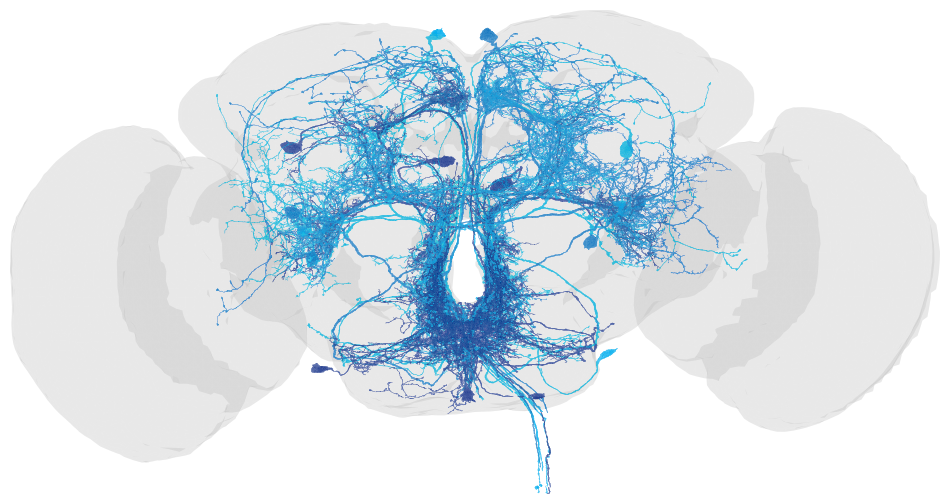

In [39]:
# Plot neurons
#
# Posterior view: ('-x','-y')
# Anterior view: ('x','-y')
# Dorsal view: ('-x','-z')
# Side view: ('-y','-z') 

fig, ax = navis.plot2d(
    [brain.mesh, n], 
    dps_scale_vec = 1000,    
    method = '2d', 
    view = ('-x','-y'), 
    figsize = (12, 12),
    color = color, 
    )

# plt.savefig(r'C:/Users/Chris/Desktop/figure.png', dpi=400)
plt.show()